In [17]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm.auto import tqdm
import random
tqdm.pandas()

In [18]:
RECORDS_PATH = '../../output/domain_analysis/affiliate/records_sort_by_landing_page_02_21.csv'
df = pd.read_csv(RECORDS_PATH)

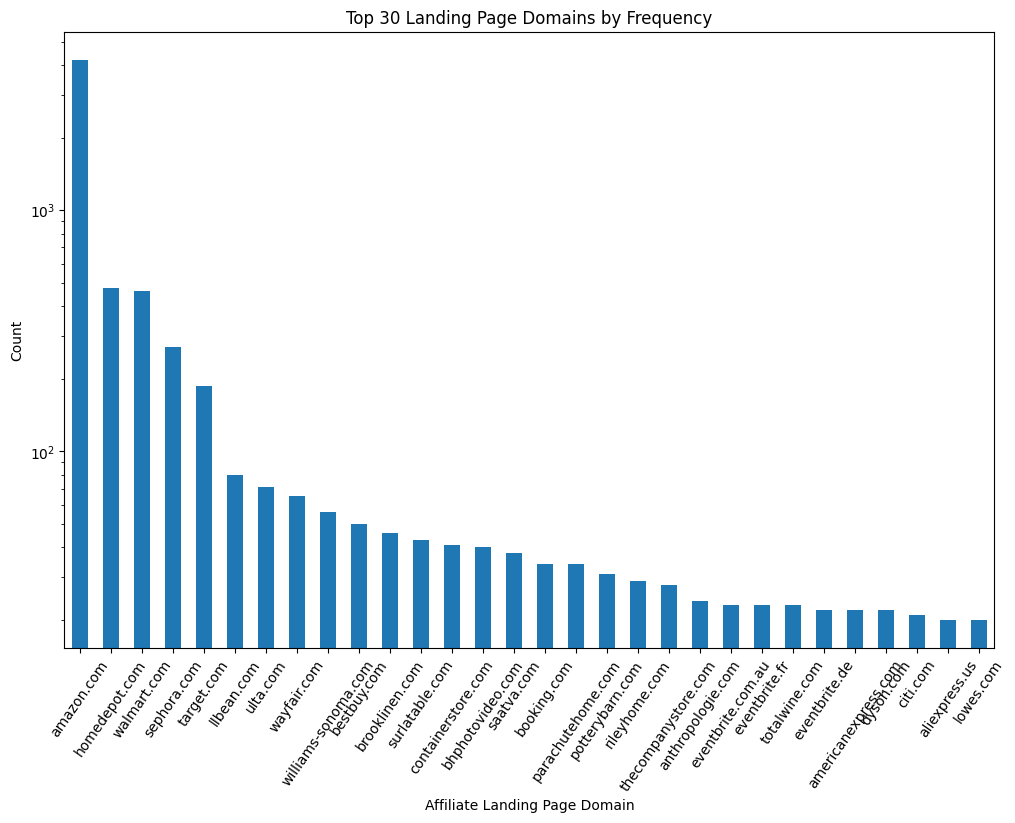

In [19]:
domain_counts = df['landing_page_domain'].value_counts()

# Selecting the top 30 domains
top_30_domains = domain_counts.head(30)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_30_domains.plot(kind='bar')
plt.xlabel('Affiliate Landing Page Domain')
plt.ylabel('Count')
plt.title('Top 30 Landing Page Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=55)  # Rotate labels for better readability
plt.show()


In [21]:
landing_page_domain = df['landing_page_domain'].nunique()
print(f"Number of unique landing page domains in affiliate links: {landing_page_domain}")

Number of unique landing page domains in affiliate links: 797


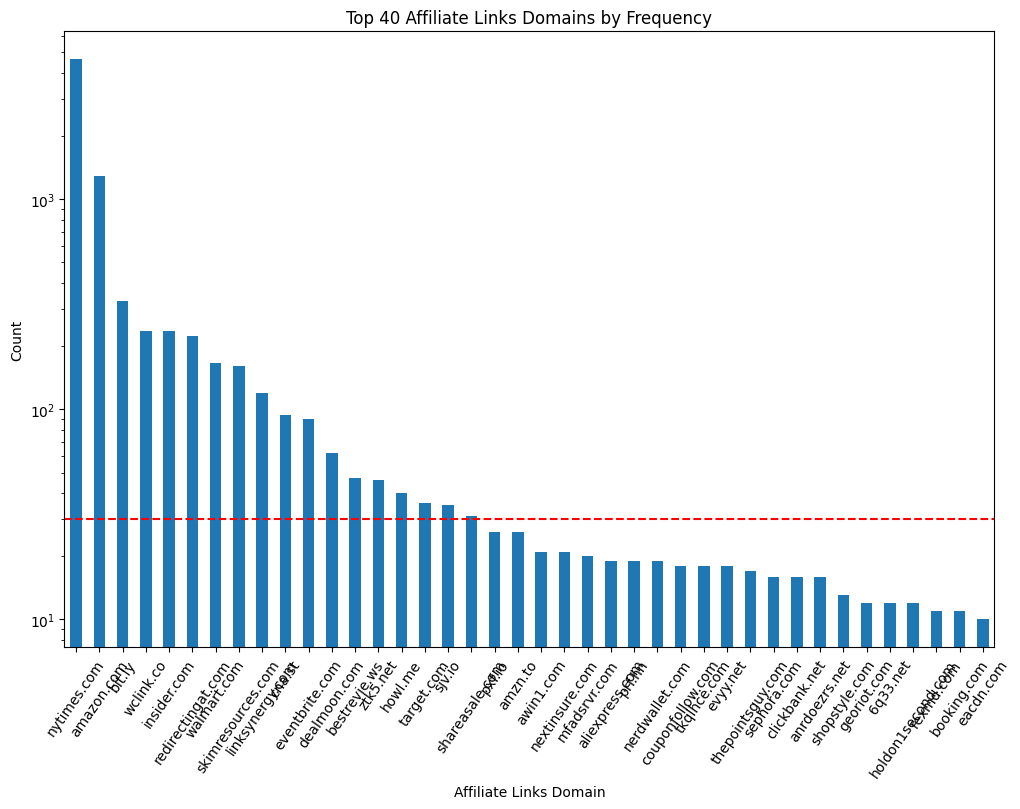

In [22]:
# Assuming df is your DataFrame
# Assuming df is your DataFrame

# Assuming df is your DataFrame
domain_counts = df['url_domain'].value_counts()

# Selecting the top 40 domains
top_40_domains = domain_counts.head(40)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_40_domains.plot(kind='bar')
plt.xlabel('Affiliate Links Domain')
plt.ylabel('Count')
plt.title('Top 40 Affiliate Links Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=55)  # Rotate labels for better readability

# Add a horizontal line at y=30
plt.axhline(y=30, color='r', linestyle='--')

plt.show()

In [24]:
print(f"Total affiliate link: {len(df)}")

Total affiliate link: 8634


In [25]:
# dict of url_domain_frenquency
domain_url_counts = df.groupby('url_domain')['url'].nunique()
print("Number of unique url domain: ", len(domain_url_counts))
domain_url_counts_dict = domain_url_counts.to_dict()
sorted_domain_url_counts_dict = dict(sorted(domain_url_counts_dict.items(), key=lambda item: item[1], reverse=True))
print(f"URL domain frenquency on affiliate: {sorted_domain_url_counts_dict}")

Number of unique url domain:  225
URL domain frenquency on affiliate: {'nytimes.com': 4621, 'amazon.com': 1293, 'bit.ly': 314, 'insider.com': 236, 'wclink.co': 236, 'redirectingat.com': 222, 'walmart.com': 166, 'skimresources.com': 150, 'linksynergy.com': 116, 'cna.st': 94, 'dealmoon.com': 62, 'ztk5.net': 46, 'bestrevie.ws': 43, 'howl.me': 40, 'target.com': 36, 'sjv.io': 35, 'shareasale.com': 31, 'eventbrite.com': 29, 'pxf.io': 26, 'amzn.to': 23, 'awin1.com': 21, 'mfadsrvr.com': 20, 'nerdwallet.com': 19, 'nextinsure.com': 19, 'prf.hn': 19, 'couponfollow.com': 18, 'thepointsguy.com': 17, 'tkqlhce.com': 17, 'anrdoezrs.net': 16, 'evyy.net': 16, 'sephora.com': 16, 'clickbank.net': 14, 'shopstyle.com': 13, '6q33.net': 12, 'georiot.com': 12, 'aliexpress.com': 11, 'booking.com': 11, 'bradsdeals.com': 9, 'pjatr.com': 9, 'ulta.com': 9, 'creditkarma.com': 8, 'shope.ee': 8, 'cyberlink.com': 7, 'dscgirls.live': 7, 'eacdn.com': 6, 'mcafee.com': 6, '5ad6.net': 5, 'jdoqocy.com': 5, 'kleinanzeigen.de'

In [26]:
# Sort domains by frequency, and choose top X domain  
# can be used for traning/testing  
cutoff_ratio = 0.10  # X
domain_counts = df['url_domain'].value_counts()
sorted_domains = domain_counts.index.tolist()
#print("sorted_domains: ", sorted_domains)
# Select domains for training based on cutoff ratio
cutoff = int(len(sorted_domains) * cutoff_ratio)
sorted_domains = set(sorted_domains[:cutoff])
print(f"Top {(1-cutoff_ratio)*100}% domain: {sorted_domains}")

ad_df_top_domain = df[df['url_domain'].isin(sorted_domains)]
print(f"Number of ad url in top {(1-cutoff_ratio)*100}% domain: {len(ad_df_top_domain)}")

ad_df_not_in_top_domain = df[~df['url_domain'].isin(sorted_domains)]
print(f"Number of ad url not in top {(1-cutoff_ratio)*100}% domain: {len(ad_df_not_in_top_domain)}")

Top 90.0% domain: {'skimresources.com', 'ztk5.net', 'wclink.co', 'amazon.com', 'insider.com', 'dealmoon.com', 'shareasale.com', 'amzn.to', 'linksynergy.com', 'sjv.io', 'bestrevie.ws', 'pxf.io', 'bit.ly', 'nextinsure.com', 'awin1.com', 'cna.st', 'walmart.com', 'nytimes.com', 'eventbrite.com', 'redirectingat.com', 'target.com', 'howl.me'}
Number of ad url in top 90.0% domain: 7966
Number of ad url not in top 90.0% domain: 668


In [27]:
url_domain = df['url_domain'].nunique()
print(f"Number of unique url domains in affiliate links: {url_domain}")

Number of unique url domains in affiliate links: 225


In [28]:
# Initialize an empty DataFrame to store the selected URLs
selected_df = pd.DataFrame(columns=df.columns)  

# Get unique domain names
unique_domains = df['url_domain'].unique()

for domain in unique_domains:
    # Select URLs for the current domain
    domain_urls = df[df['url_domain'] == domain]['url']

    # Limit to 20 URLs if there are more than 20
    if len(domain_urls) > 30:
        selected_urls = domain_urls.sample(n=30, random_state=42)  # Adjust random_state as needed
    else:
        selected_urls = domain_urls

    # Append selected URLs to the DataFrame
    selected_df = pd.concat([selected_df, selected_urls])

print("Uniform distribution: ", len(selected_df))
print(selected_df.columns)

Uniform distribution:  1302
Index([                    0,          'Unnamed: 0',       'domain_counts',
       'landing_page_domain',    'landing_page_url',       'parent_domain',
           'parent_page_url',                 'url',          'url_domain',
                  'visit_id'],
      dtype='object')


In [29]:
AD_RECORDS_PATH = '../../output/domain_analysis/ads/records_sort_by_landing_page_02_21.csv'
ad_df = pd.read_csv(AD_RECORDS_PATH)

In [30]:
number_of_ads = len(ad_df)
print("number of ads: ", number_of_ads)

number of ads:  2680


In [31]:
landing_page_domain = ad_df['landing_page_domain'].nunique()
print(f"Number of unique landing page domains in ads links: {landing_page_domain}")

Number of unique landing page domains in ads links: 1385


In [34]:
url_domain = ad_df['url_domain'].nunique()
print(f"Number of unique url domains in ads links: {url_domain}")

# dict of url_domain_frenquency
domain_url_counts = ad_df.groupby('url_domain')['url'].nunique()
domain_url_counts_dict = domain_url_counts.to_dict()
sorted_domain_url_counts_dict = dict(sorted(domain_url_counts_dict.items(), key=lambda item: item[1], reverse=True))
print(sorted_domain_url_counts_dict)

Number of unique url domains in ads links: 235
{'doubleclick.net': 1250, 'taboola.com': 305, 'outbrain.com': 118, 'revcontent.com': 106, '3lift.com': 69, 'mgid.com': 36, 'googleadservices.com': 31, 'magsrv.com': 26, 'adnxs.com': 20, 'mfadsrvr.com': 19, 'quantserve.com': 16, 'servedbyadbutler.com': 16, 'ad.style': 14, 'zemanta.com': 14, 'e-planning.net': 12, 'amazon-adsystem.com': 11, 'lby2kd27c.com': 11, '14trackdomain.com': 10, 'aliexpress.com': 10, 'gsjln04hd.com': 10, 'idealmedia.io': 10, 'nomorepecans.com': 10, 'adzerk.net': 9, 'ezodn.com': 9, 'postrelease.com': 9, 'adtng.com': 8, 'nui.media': 8, 'yna.co.kr': 8, 'contentsfeed.com': 7, 'newmedia.az': 7, 'theshorthorn.com': 7, 'ybs2ffs7v.com': 7, 'akmxts.com': 6, 'openx.net': 6, 'prf.hn': 6, 'wellsmedia.com': 6, '51cto.com': 5, 'dxmjyxksvc.com': 5, 'hhbypdoecp.com': 5, 'jetpackdigital.com': 5, 'loboclick.com': 5, 'wibtntmvox.com': 5, 'xlivrdr.com': 5, 'advertserve.com': 4, 'eacdn.com': 4, 'everesttech.net': 4, 'mnaspm.com': 4, 'orbsr

In [35]:
# Randomly shuffle # of unique domain times
# Each round will pick one domain as unseen data set

total_unique_domains = ad_df['url_domain'].nunique()
num_trials = 10
print("Total unique domains:", total_unique_domains)

all_selected_domains_with_freq = []
all_selected_domains = set()

for _ in range(num_trials):
    selected_domains = {}
    unique_domains_list = ad_df['url_domain'].unique()
    # selected_unique_domains = random.sample(list(unique_domains_list), int(total_unique_domains * cutoff_ratio))
    selected_unique_domains = random.sample(list(unique_domains_list), 5)
    
    for domain in selected_unique_domains:
        domain_count = ad_df[ad_df['url_domain'] == domain]['url_domain'].count()
        selected_domains[domain] = domain_count
        all_selected_domains.add(domain)
    
    all_selected_domains_with_freq.append(selected_domains)

print(f"Total number of selected unique domain sets after {num_trials} trials:", len(all_selected_domains_with_freq))

for i in range(len(all_selected_domains_with_freq)):
    print(all_selected_domains_with_freq[i])

Total unique domains: 235
Total number of selected unique domain sets after 10 trials: 10
{'jetpackdigital.com': 5, 'contentsfeed.com': 7, 'stackadapt.com': 4, 'pressdemocrat.com': 1, 'adblade.com': 1}
{'nexttv.com': 1, 'zlinkd.com': 3, 'ftd.agency': 3, 'breedingpulverize.com': 1, 'ctengine.io': 2}
{'stereotyperobe.com': 1, 'woafoame.net': 1, 'grabo.bg': 1, 'rmhfrtnd.com': 1, 'irna.ir': 2}
{'nwmissourinews.com': 3, 'eacdn.com': 4, 'bluetoad.com': 1, 'horsebackbeatingangular.com': 1, 'odt.co.nz': 3}
{'docomo.ne.jp': 2, 'fvcwqkkqmuv.com': 1, 'logly.co.jp': 2, 'uatrav.com': 2, 'buysellads.com': 1}
{'mixi.media': 1, 'gml-grp.com': 2, 'goaserv.com': 1, 'nabjonline.org': 1, 'twinrdsrv.com': 1}
{'frap.site': 3, 'blg-1216lb.com': 3, 'stereotyperobe.com': 1, 'nordvpn.net': 1, '10bet.com': 2}
{'broadstreetads.com': 2, 'rhpedia.com': 2, 'dream.co.id': 2, 'trafficfactory.biz': 1, 'freshpops.net': 1}
{'clmbtech.com': 2, 'gaming-city.com': 1, 'zemanta.com': 14, 'avantlink.com': 2, 'lby2kd27c.com': 1

In [36]:
# Sort domains by frequency, and choose top X domain  
# can be used for traning/testing  
cutoff_ratio = 0.3  # X
domain_counts = ad_df['url_domain'].value_counts()
sorted_domains = domain_counts.index.tolist()
#print("sorted_domains: ", sorted_domains)
# Select domains for training based on cutoff ratio
cutoff = int(len(sorted_domains) * cutoff_ratio)
sorted_domains = set(sorted_domains[:cutoff])
print(f"Top {(1-cutoff_ratio)*100}% domain: {sorted_domains}")

ad_df_top_domain = ad_df[ad_df['url_domain'].isin(sorted_domains)]
print(f"Number of ad url in top {(1-cutoff_ratio)*100}% domain: {len(ad_df_top_domain)}")

ad_df_not_in_top_domain = ad_df[~ad_df['url_domain'].isin(sorted_domains)]
print(f"Number of ad url not in top {(1-cutoff_ratio)*100}% domain: {len(ad_df_not_in_top_domain)}")

Top 70.0% domain: {'xlviiirdr.com', 'lby2kd27c.com', 'dxmjyxksvc.com', 'pipaffiliates.com', 'doubleclick.net', 'idealmedia.io', 'yna.co.kr', 'serving-sys.com', 'chaturbate.com', 'googlesyndication.com', 'bestcontentprovider.top', 'mgid.com', 'quantserve.com', 'imv.az', 'aliexpress.com', 'advertserve.com', 'tsyndicate.com', 'postrelease.com', 'contentsfeed.com', 'orbsrv.com', 'adtng.com', 'prf.hn', 'revcontent.com', 'livesportmedia.eu', 'amazon-adsystem.com', 'ezodn.com', 'mfadsrvr.com', 'googleadservices.com', 'hhbypdoecp.com', 'openx.net', 'stackadapt.com', 'theshorthorn.com', 'magsrv.com', 'adroll.com', 'nwmissourinews.com', 'frap.site', 'dtiserv2.com', 'e-planning.net', 'adnxs.com', '51cto.com', 'wibtntmvox.com', 'nui.media', 'eghtesadonline.com', 'eacdn.com', 'pugsgivehugs.com', 'adskeeper.com', 'everesttech.net', 'nomorepecans.com', 'gsjln04hd.com', '3lift.com', 'ad.style', '14trackdomain.com', 'newmedia.az', 'adzerk.net', 'akmxts.com', 'jetpackdigital.com', 'adnuntius.com', 'zerg

In [37]:
# Initialize an empty DataFrame to store the selected URLs
selected_df = pd.DataFrame(columns=ad_df.columns)  

# Get unique domain names
unique_domains = ad_df['url_domain'].unique()

for domain in unique_domains:
    # Select URLs for the current domain
    domain_urls = ad_df[ad_df['url_domain'] == domain]['url']

    # Limit to 20 URLs if there are more than 20
    if len(domain_urls) > 30:
        selected_urls = domain_urls.sample(n=30, random_state=42)  # Adjust random_state as needed
    else:
        selected_urls = domain_urls

    # Append selected URLs to the DataFrame
    selected_df = pd.concat([selected_df, selected_urls])

print("Uniform distribution: ", len(selected_df))
print(selected_df.columns)

Uniform distribution:  909
Index([                    0,          'Unnamed: 0',       'domain_counts',
       'landing_page_domain',    'landing_page_url',       'parent_domain',
           'parent_page_url',     'parent_visit_id',                 'url',
                'url_domain',            'visit_id'],
      dtype='object')


How many url both label as affiliate and ads? 

In [42]:
aff_df = df
df_aff_with_underscore = aff_df[aff_df['visit_id'].str.contains('_')]
print("New crawled affiliate link: ", len(df_aff_with_underscore))

New crawled affiliate link:  801


In [41]:
aff_df = df

# Extract visit_ids from each dataframe
affiliate_visit_ids = set(aff_df['visit_id'])
ads_visit_ids = set(ad_df['visit_id'])
common_visit_ids = affiliate_visit_ids.intersection(ads_visit_ids)
print(common_visit_ids)
common_visit_id_count = len(common_visit_ids)
print(f"The number of visit_ids appearing in both affiliate and ads dataframes is: {common_visit_id_count}")

# Filter rows in the affiliate dataframe for common visit_ids
common_affiliate_rows = aff_df[aff_df['visit_id'].isin(common_visit_ids)]

# Filter rows in the ads dataframe for common visit_ids
common_ads_rows = ad_df[ad_df['visit_id'].isin(common_visit_ids)]

# Display the common rows for each dataframe
print("Common rows in affiliate dataframe:")
common_affiliate_rows.to_csv("../../output/results/02_21_uniform_Kfold_CV/common_aff_ads.csv")

print("\nCommon rows in ads dataframe:")
print(len(common_ads_rows))


{'3309802305959221_14', '5382901220674597_24', '4310387995808155_10', '964179629386589_23', '4310387995808155_8', '4310387995808155_9', '3309802305959221_13', '4310387995808155_5', '5818765497582470_7', '5382901220674597_14', '7747596029879428_13', '8905266577477404_2', '8519760202326216_4', '2170316223153412_5', '7491221905357315_9', '3309802305959221_22', '4310387995808155_17', '2031699304775711_3', '5382901220674597_18', '2170316223153412_9', '5382901220674597_21', '6722835587452366_22', '4310387995808155_4', '3309802305959221_10', '1445965741067189_2', '6395576380543090_15', '4310387995808155_13', '4310387995808155_15', '1445375841853598_4', '1330937556174663_3', '4982740783060212_5', '7491221905357315_7', '5382901220674597_16', '8128012699284643_3', '7272019448115452_25', '5382901220674597_15', '5382901220674597_20', '5087099864065618_4', '2170316223153412_6', '3309802305959221_9', '5382901220674597_27', '2170316223153412_3', '1928420329374394_12', '2773256365281961_25', '43103879

In [9]:
filtered_df = ad_df[ad_df['url_domain'] == 'revcontent.com']

# Printing the filtered DataFrame
print(filtered_df['url'])

225    https://smeagol.revcontent.com/cv/v3/IXUWtc123...
226    https://smeagol.revcontent.com/cv/v3/2yFPsr-D8...
227    https://smeagol.revcontent.com/cv/v3/xa_2dCbOC...
228    https://smeagol.revcontent.com/cv/v3/Dxu6tccSp...
229    https://smeagol.revcontent.com/cv/v3/L_GY4l4dX...
                             ...                        
678    https://smeagol.revcontent.com/cv/v3/mdqdVHhct...
683    https://smeagol.revcontent.com/v3/cdhuQUCZTZUj...
699    https://smeagol.revcontent.com/cv/v3/fa_L7APXt...
739    https://smeagol.revcontent.com/cv/v3/Lejom6yC5...
758    https://smeagol.revcontent.com/cv/v3/F3KZtCn41...
Name: url, Length: 62, dtype: object


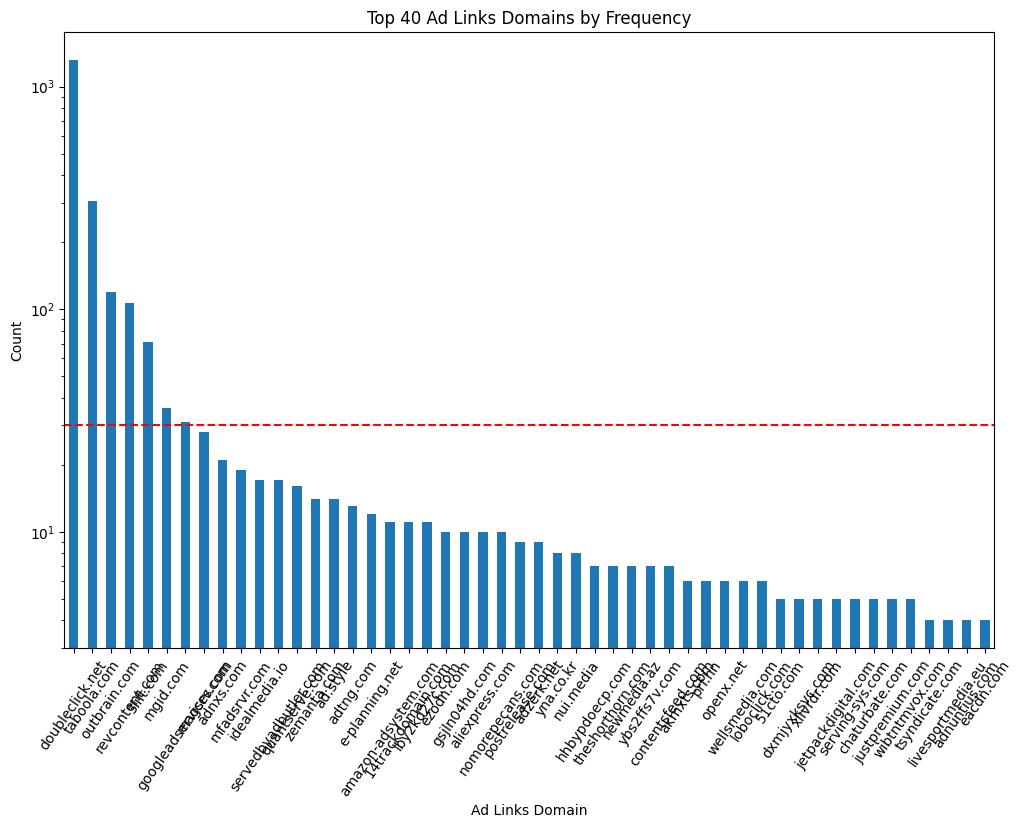

In [39]:
# Assuming df is your DataFrame
domain_counts = ad_df['url_domain'].value_counts()

# Selecting the top 40 domains
top_40_domains = domain_counts.head(50)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_40_domains.plot(kind='bar')
plt.xlabel('Ad Links Domain')
plt.ylabel('Count')
plt.title('Top 40 Ad Links Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=55)  # Rotate labels for better readability

# Add a horizontal line at y=30
plt.axhline(y=30, color='r', linestyle='--')

plt.show()

In [18]:
landing_page_domain = ad_df['landing_page_domain'].nunique()
print(f"Number of unique landing page domains in ad links: {landing_page_domain}")

Number of unique landing page domains in ad links: 658


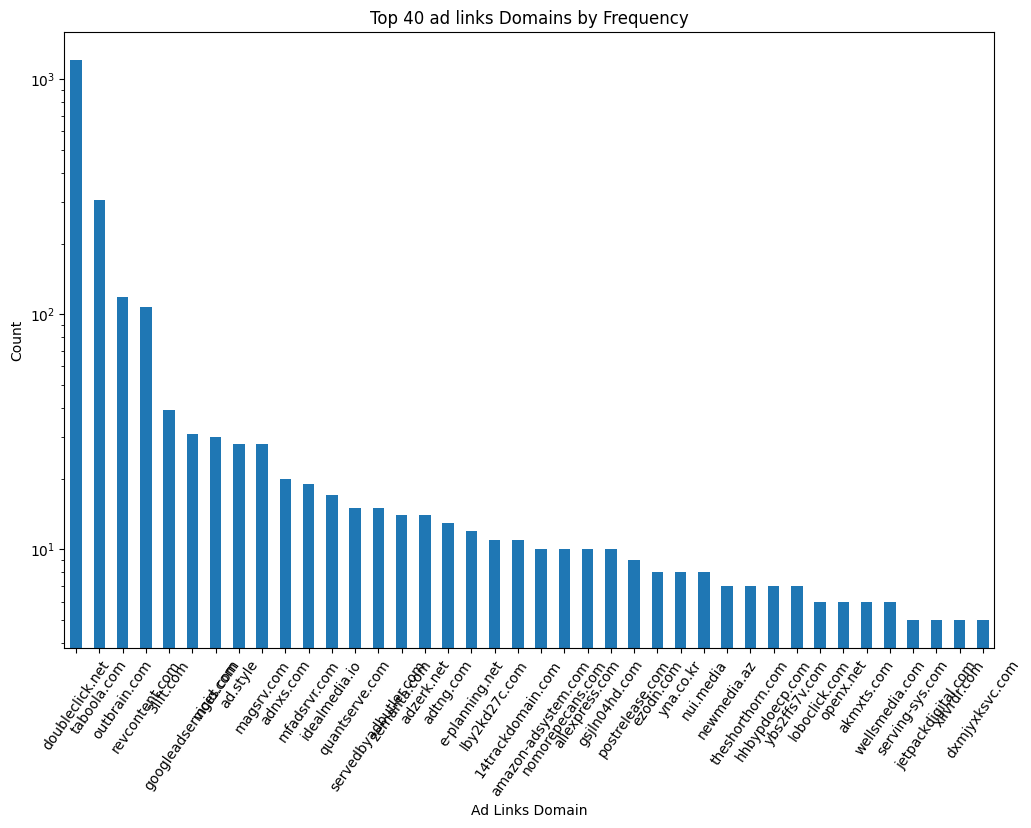

In [26]:
# Assuming df is your DataFrame
# Assuming df is your DataFrame
domain_counts = ad_df['url_domain'].value_counts()

# Selecting the top 30 domains
top_30_domains = domain_counts.head(40)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_30_domains.plot(kind='bar')
plt.xlabel('Ad Links Domain')
plt.ylabel('Count')
plt.title('Top 40 ad links Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=55)  # Rotate labels for better readability
plt.show()

In [21]:
url_domain = ad_df['url_domain'].nunique()
print(f"Number of unique url domains in ad links: {url_domain}")

Number of unique url domains in ad links: 136


In [15]:
path = "/home/data/chensun/affi_project/purl/output/ads/crawl_tranco_sites_100/label.csv"
df = pd.read_csv(path)
# Modify the "label" column
df.loc[df['label'] == 'affiliate', 'label'] = 'ads'

# Save the modified DataFrame back to the CSV file
df.to_csv('/home/data/chensun/affi_project/purl/output/ads/crawl_tranco_sites_100/label_modified.csv', index=False)